This project verifies that a convolutional Neural network is better than a fully connected neural network for image classification tasks.

In [1]:
#import packages here
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


2024-03-03 14:34:44.859864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the data

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

The mnist data set is a large colelction of handwritten digits and is used for image processing.

Shapes of data: X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)

There are 60k images in the training test, and the vectors of each are 28x29. 

In [3]:
#shapes of data
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


## Part 1:  Use fully connected neural network to do image classification

Fully connected neural networks were used to solve image classification problems before convolutional neural networks were created. It is obvious that fully connected neural network is not a good model since we are not using it for image classification. In this part, we want to verify that fully connected does not work well for image classification.

### Data Preparation:

Recall that the input of fully connected neural network should be a 2D numpy array where each row reprensents a data samples and each column is a feature. However, image dataset is a 3D numpy array. So, the first thing you need to do is processing your dataset.

The key idea is the following: **We flatten each image (2D numpy array) to a 1D numpy array, and then stack them to a 2D numpy array. Each row should represent a flattened image**

Technical hint: np.flatten https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

#### Steps and Requirements:
1. You should write a python function to process your training samples and test samples. Detailed docstrings are required to explain your inputs and outputs. In-line comments are also required to explain your code.

2. Construct a fully connected neural network to train your model. You have the freedom to determine the network structure, optimizers, epochs, batch_size, activation function, initialization, and etc. **You should use markdown to explain your choices.** 

3. Make sure your neural network is fully trained.

4. Use your model to predict test accuracy. Then please select some test images and visualize them (use subplots). For each subplot, you should use true label, predicted label and predicated probability as your xlabel. (You can go back to CNN lecture notes where I include true labels and predicted labels as xlabel. You should find a way to include probability.)

#### Grading policy: 

Grading is based on several parts:
1. meet above requirements
2. correctness of code and explanation

Epoch 1/20
750/750 [==============================] - 7s 7ms/step - loss: 2.5172 - accuracy: 0.8790 - val_loss: 0.6281 - val_accuracy: 0.9137
Epoch 2/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3716 - accuracy: 0.9315 - val_loss: 0.3246 - val_accuracy: 0.9348
Epoch 3/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2098 - accuracy: 0.9497 - val_loss: 0.2570 - val_accuracy: 0.9435
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.1574 - accuracy: 0.9596 - val_loss: 0.2317 - val_accuracy: 0.9538
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 0.1334 - accuracy: 0.9651 - val_loss: 0.2277 - val_accuracy: 0.9467
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.1243 - accuracy: 0.9666 - val_loss: 0.2233 - val_accuracy: 0.9490
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 0.1163 - accuracy: 0.9681 - val_loss: 0.1854 - val_accuracy: 0.9567
Epoch 

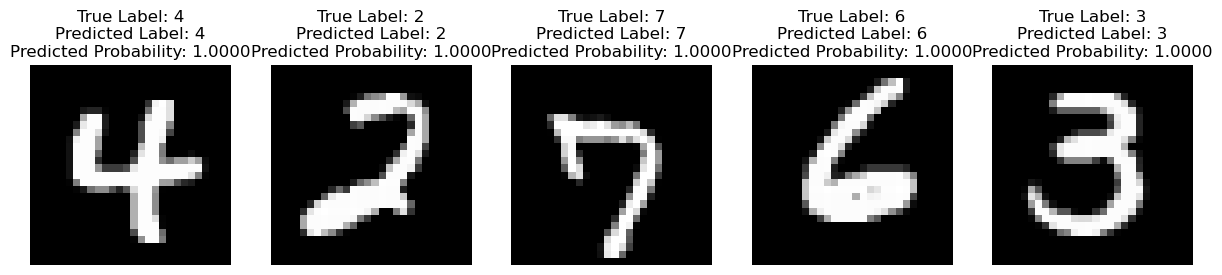

In [9]:
# your solution here
def flatten_images(images):
    #this function flattens each image (2d numpy array to a 1D numpy array, and stacks to a 2d numpy array, each row represents a flattened image)
    flattened_images= np.array([image.flatten() for image in images])
    return flattened_images

xtrainflat= flatten_images(train_X)
xtestflat= flatten_images(test_X)

#fully connected neural network model
model= Sequential([
    #256 arbitrary, 784 is because 28x28=784, 128 is common, and 10 because numbers go from 0-9 
    Dense(256, input_shape=(784,), activation='relu'),
    Dense(128, activation='relu'),
    #used softmax function to output probabilities, ensure sum equals 1, 
    Dense(10, activation='softmax')
])

#the model with categorical cross-entropy loss
#learning rate in adam optimizer is 0.001, chose to keep the default values 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model with integer labels
#used 20 epochs and validation split of 0.2 because it is considered common practice, 
#20 epochs is enough to train while not being too computationally expensive
#used a batch size of 64 because it is typical to use batch size of 64, especially with a learning rate of 0.01 (check markdown for more)
history= model.fit(xtrainflat, train_y, epochs=20, batch_size=64, validation_split=0.2)

#evaluate the model on test data
test_loss, test_accuracy= model.evaluate(xtestflat, test_y)
print("Test Accuracy:", test_accuracy)

#visualize 5 test images along with true labels, predicted labels, and predicted probabilities

num_images= 5
sample_indices= np.random.choice(len(test_X), num_images, replace=False)

fig, axes= plt.subplots(1, num_images, figsize=(15, 3))

for i, idx in enumerate(sample_indices):
    test_image = test_X[idx]
    true_label = test_y[idx]
    test_image_flattened = xtestflat[idx]
    
    #predict
    predicted_probabilities = model.predict(np.expand_dims(test_image_flattened, axis=0))
    predicted_label = np.argmax(predicted_probabilities)
    
    axes[i].imshow(test_image, cmap='gray')
    axes[i].set_title(f"True Label: {true_label}\nPredicted Label: {predicted_label}\nPredicted Probability: {predicted_probabilities[0][predicted_label]:.4f}")
    axes[i].axis('off')

plt.show()
#as number of epochs increases, loss decreases while accuracy increases


To complete part 1, I created a function that flattens the images, according to the technical hint. 256 neurons provides the model with enough capacity to learn complex patterns and representations from the input data. With more neurons, the model can capture a wider range of features and relationships, potentially leading to better performance. The 784 comes from 28x28 pixels for input features. 128 neurons is also arbitrary and provides the model with enough capacity to learn complex patterns from input data. 10 neurons were chosen because there are 10 digits. 

In the adam optimizer, I stuck with the default learning rate of 0.001 because it seemed like common practice from notes and other sources. 

I used 20 epochs and validation split of 0.2 because it is considered common practice, specifically because 20 epochs is enough to train while not being too computationally expensive, and validation split of 80% train and 20% validating data is a good split to train and validate. 
I used a batch size of 64 because it is typical to use batch size of 64, especially with a learning rate of 0.01. In this medium article, I found that the lower the batch sizes, the better the accuracy, however it also depends on the learning rate: https://medium.com/geekculture/how-does-batch-size-impact-your-model-learning-2dd34d9fb1fa

To train this, it did not take an extremely long time and the probabilites are close to 1. Loss gets really close to 0 and accuracy is about 0.97.

# Part 2: Convolutional Neural Network for image classification 

In this part, we will use convolution neural network to repeat image classification problem. 

#### Requirements:
1. You should construct a convolutional neural network. You have the freedom to determine the network structure, optimizers, epochs, batch_size, activation function, initialization, and etc. **You should use markdown to explain your choices.** 

2. You should try different tricks to increase prediction accuracy. 

3. Make sure your convolutional neural network is fully trained.

4. After training your model, you should test your model on test dataset. You should make the test accuracy higher than 93%. Low test accuracy will lead to grade deduction.

5. Use your model to predict test accuracy. Then please select some test images and visualize them (use subplots). For each subplot, you should use true label, predicted label and predicated probability as your xlabel. (You can go back to CNN lecture notes where I include true labels and predicted labels as xlabel. You should find a way to include probability.)

6. Explain your code and result using in-line comments and markdown. Lack of words will lead to a huge amout of deduction.



#### Grading policy: 

Grading is based on several parts:
1. meet above requirements 
2. correctness of code and explanation


Epoch 1/10
750/750 [==============================] - 45s 57ms/step - loss: 0.5225 - accuracy: 0.9348 - val_loss: 0.0968 - val_accuracy: 0.9705
Epoch 2/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.0722 - val_accuracy: 0.9797
Epoch 3/10
750/750 [==============================] - 44s 58ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0731 - val_accuracy: 0.9802
Epoch 4/10
750/750 [==============================] - 44s 59ms/step - loss: 0.0346 - accuracy: 0.9886 - val_loss: 0.0672 - val_accuracy: 0.9843
Epoch 5/10
750/750 [==============================] - 45s 61ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0785 - val_accuracy: 0.9817
Epoch 6/10
750/750 [==============================] - 48s 64ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0621 - val_accuracy: 0.9866
Epoch 7/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0609 - val_accuracy:

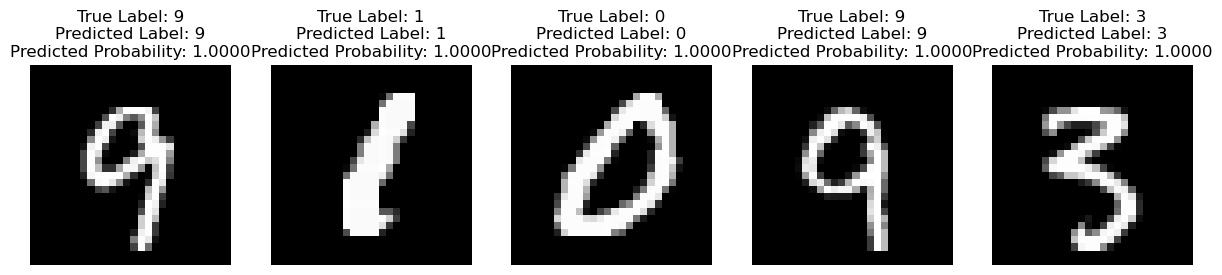

In [4]:
#CNN 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

model = Sequential([
    #chose 32 because arbitrary and common, kernel size of 3x3 because 5x5 too big, and 1x1 too small
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    #balancing between computational efficiency and retaining important features
    MaxPooling2D(pool_size=(2, 2)),
    #doubled nuerons
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #convert 3d tensor into 1d vector
    Flatten(),
    #doubled nuerons again
    Dense(128, activation='relu'),
    #10 digits
    Dense(10, activation='softmax')
])

#compile the model using adam optimizer, kept default arguments, categoricalcrossentropy loss 
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

#train the model
#80% training data 20% validation data because it is good split to between training and validating
#20 epochs because enough to train but not too computationally expensive. took a long time to run with 20 epochs (20 mins)
#history= model.fit(train_X, to_categorical(train_y), epochs=20, batch_size=64, validation_split=0.2)
#tried with epoch=10, only took 7 mins but slightly less training accuracy
history= model.fit(train_X, to_categorical(train_y), epochs=10, batch_size=64, validation_split=0.2)

#evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_X, to_categorical(test_y))
print("Test Accuracy:", test_accuracy)

#visualize some test images along with true labels, predicted labels, and predicted probabilities
num_images_to_visualize= 5
sample_indices= np.random.choice(len(test_X), num_images_to_visualize, replace=False)

fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(15, 3))

for i, idx in enumerate(sample_indices):
    test_image= test_X[idx]
    true_label= test_y[idx]
    
    #predict probabilities
    predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
    predicted_label = np.argmax(predicted_probabilities)
    
    axes[i].imshow(test_image.squeeze(), cmap='gray')
    axes[i].set_title(f"True Label: {true_label}\nPredicted Label: {predicted_label}\nPredicted Probability: {predicted_probabilities[0][predicted_label]:.4f}")
    axes[i].axis('off')

plt.show()


I chose 32 neurons because it seems like standard practice according to the notes and other resources. I picked a kernel size of 3x3 because it 1x1 seems to small and 5x5 is too big of a kernzel size. The input shape is 28,28,1 because those are the dimensions of the image. I chose a pool size of 2,2 to make it more computationally efficient through the downsizing effect. I doubled the neurons as part of common practice with CNN to capture a wide range of features. It does computationally cost more, however the results are good. 

While training the model, I did a 0.2 validation split again because 80% training data 20% validation data because it is good split to between training and validating.
I used 20 epochs again because it is enough to train but not too computationally expensive, however it took a long time to run with 20 epochs (20 mins)
When I tried with 10, it only took 7 minutes to run but slightly less training accuracy, however the test accuracy was still in the 0.98 range. 
